# Task 6 - Prediction using Decision Tree Algorithm
## Task objective : Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
 - By Himangshu Baruah

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns

sns.set()

## Load and Forming the iris datasets.

In [2]:
iris = ds.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
y = iris.target
print('Classes to predict :', iris.target_names)
y

Classes to predict : ['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Dealing with the missing values

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.shape

(150, 4)

In [6]:
len(y)

150

Since 'df' doesn't have any missing values and their no. of rows are equal to the 'y'. Hence it is clear that there is no missing value overall.

## Creating the Decision Tree (Without spliting the iris dataset) 

### Constructing the Decision Tree 

In [7]:
iris1 = iris
df1 = df.copy()
y1 = y.copy()

from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc1.fit(df1,y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


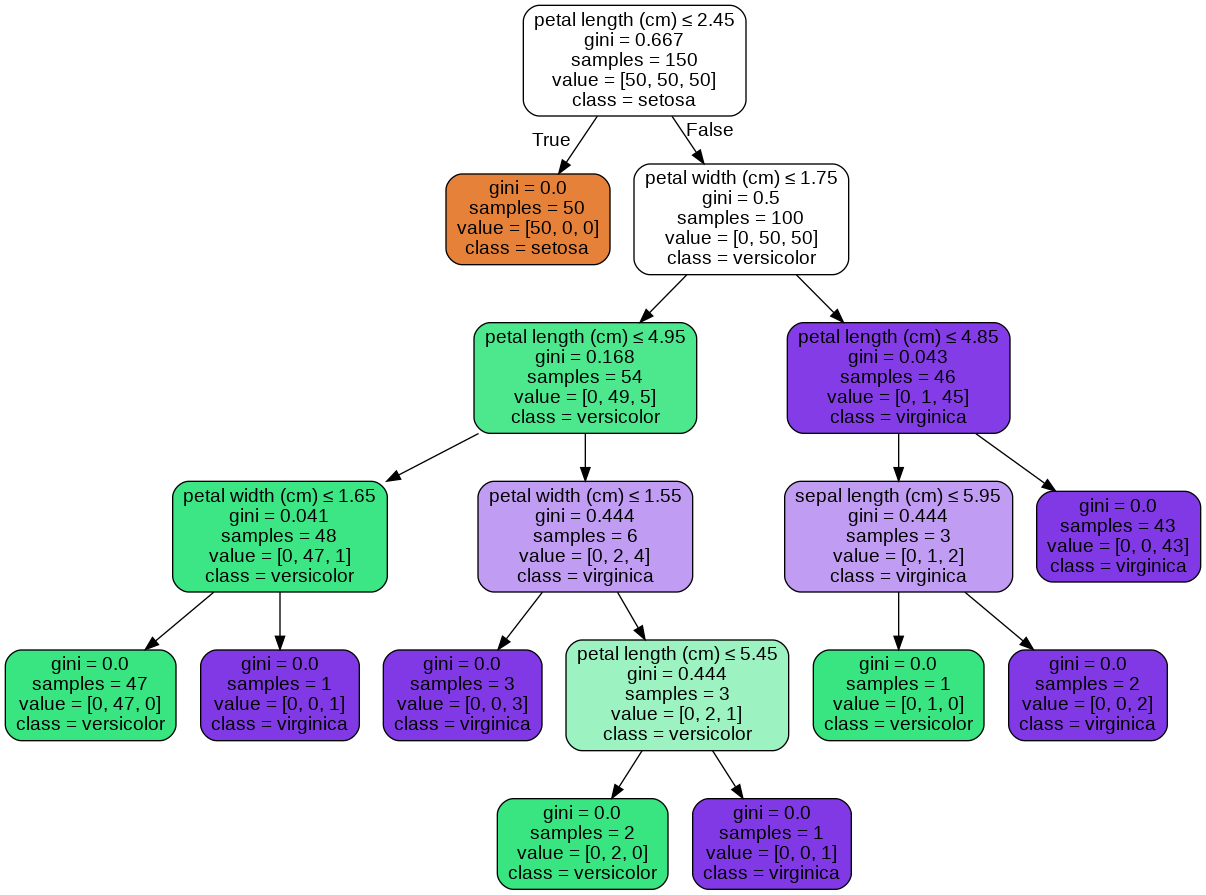

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc1, out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names=iris1.feature_names,
                class_names = iris.target_names,   
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

To many classifications just for 3 species , it's totally overfitting. Thus we need to split the Iris Data into training sets and test sets.

### Evaluating the model 

In [12]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = dtc1, X = df1, y = y1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 95.33 %
Standard Deviation: 4.27 %


## Creating a Decision Tree ( with splitting the iris dataset ) 

### Spliting the dataset

In [13]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target

xtrain, xtest, ytrain, ytest= train_test_split(x,y,random_state=50,test_size=0.25)

In [14]:
display(x.shape , y.shape)

(150, 4)

(150,)

### Creating the model


In [15]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
ypred2 = dtc2.predict(xtest)

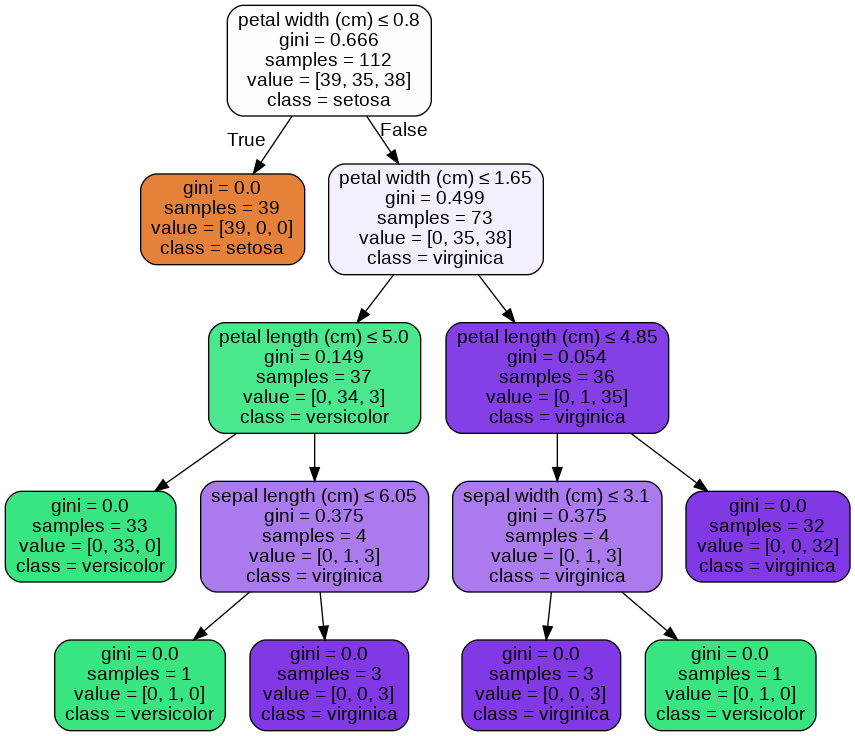

In [17]:
dot_data = StringIO()
export_graphviz(dtc2, out_file=dot_data, feature_names=iris.feature_names,
                class_names = iris.target_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluating the Model

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train data :' , accuracy_score(y_true=ytrain ,y_pred=dtc2.predict(xtrain)))
print('Accuracy score on test data :' , accuracy_score(y_true=ytest ,y_pred=ypred2) )
accuracies2 = cross_val_score(estimator = dtc2, X = xtrain, y = ytrain, cv = 10)
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy score on train data : 1.0
Accuracy score on test data : 0.9473684210526315
Standard Deviation: 11.54 %


Although the Accuracy of the 'Train data' is about 100% , its indicates that the model is overfitting which is not a good indication.

Next, we will tune the parameters of the decision tree to improve the model performance.

One of those parameters is 'min_samples_split', which is the minimum number of samples required to split an internal node. Its default value is equal to 2 because we cannot split a node containing only one example / sample.

## Creating a Improved Decision Tree ( with splitting the iris dataset ) 

### Creating the model

In [19]:
dtc3 = DecisionTreeClassifier(min_samples_split=50)
dtc3.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
ypred3 = dtc3.predict(xtest)

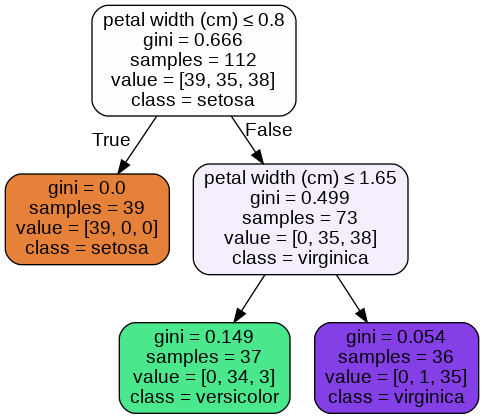

In [22]:
dot_data = StringIO()
export_graphviz(dtc3, out_file=dot_data, feature_names=iris.feature_names,
                class_names = iris.target_names,   
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluating the Model

In [21]:
print('Accuracy score on train data :' , accuracy_score(y_true=ytrain ,
                                                        y_pred=dtc3.predict(xtrain)))
print('Accuracy score on test data :' , accuracy_score(y_true=ytest ,y_pred=ypred3) )
accuracies3 = cross_val_score(estimator = dtc3, X = xtrain, y = ytrain, cv = 10)
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy score on train data : 0.9642857142857143
Accuracy score on test data : 0.9473684210526315
Standard Deviation: 9.27 %


The above classification is the more accurate classification . Also , examine the 'petal width' and 'petal width' give the more accurate classication than that of the 'sepal length' and 'sepal width'. The reason is given below with clustering.

## The reason of choosing "petal length vs petal width"

In [23]:
real_data = pd.read_csv('Iris.csv')
real_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
real_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
real_data['Species'] = real_data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1 , 'Iris-virginica':2})

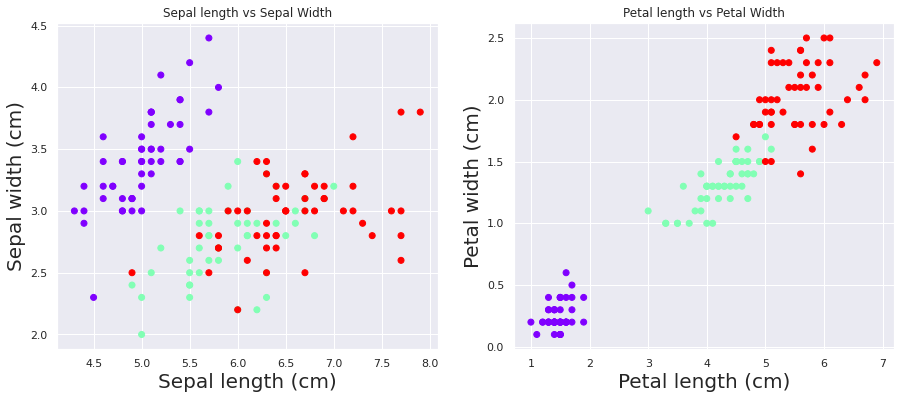

In [26]:
f , (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.scatter(real_data['SepalLengthCm'] , real_data['SepalWidthCm'], c=real_data['Species'],cmap='rainbow')
ax1.set_title('Sepal length vs Sepal Width')
ax1.set_xlabel('Sepal length (cm)',fontsize='20')
ax1.set_ylabel('Sepal width (cm)',fontsize='20')

ax2.scatter(real_data['PetalLengthCm'] , real_data['PetalWidthCm'], c=real_data['Species'],cmap='rainbow')
ax2.set_title('Petal length vs Petal Width')
ax2.set_xlabel('Petal length (cm)',fontsize='20')
ax2.set_ylabel('Petal width (cm)',fontsize='20')

plt.show()

From the above Graph, we have seen that 'petal length vs petal width' has better clusters (groups) than the 'Sepal length vs Sepal Width'. Thus 'petal length vs petal width' gives the better classication.

## Final Classification Visualisation

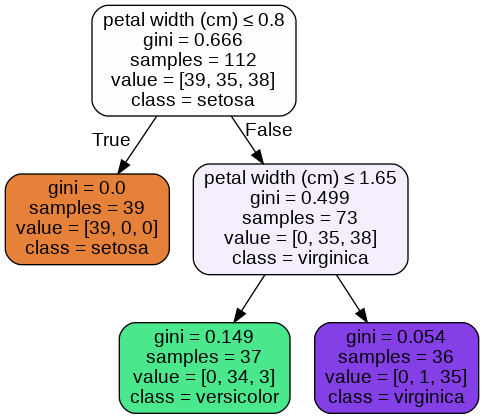

In [27]:
dot_data = StringIO()
export_graphviz(dtc3, out_file=dot_data, feature_names=iris.feature_names,
                class_names = iris.target_names,   
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Predicting the input (by using all the three models constructed)

In [28]:
input = [[5.9,2.5,4.2,3.3]]
print('From the Decesion Tree(Without spliting the Dataset) , The Output is :',iris.target_names[dtc1.predict(input)])
print('From the Decesion Tree(With spliting the Dataset) , The Output is :',iris.target_names[dtc2.predict(input)])
print('From the Improved Decesion Tree(With spliting the Dataset) , The Output is :',iris.target_names[dtc3.predict(input)])

From the Decesion Tree(Without spliting the Dataset) , The Output is : ['versicolor']
From the Decesion Tree(With spliting the Dataset) , The Output is : ['virginica']
From the Improved Decesion Tree(With spliting the Dataset) , The Output is : ['virginica']
